## Classification of accounts
This notebook uses our preprocessed data to determine what accounts are likely to be bots/not. We currently utilize 3 models
1. Random Forest Classifier
2. K-Nearest-Neighbors Classifier
3. Support Vector Classifier
4. Ada Boost Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/accounts_processed.csv')
print(df.dtypes)
print(df.shape)
df.head(5)

Unnamed: 0            int64
id                    int64
name                 object
screen_name          object
description          object
created_at           object
followers             int64
following             int64
last_updated         object
image_url            object
is_bot                int64
category              int64
bot_ratio           float64
f2f                 float64
bot_guess             int64
ave_polarity        float64
ave_subjectivity    float64
ave_length          float64
ave_hashtags        float64
ave_mentions        float64
n_tweets            float64
dtype: object
(2479, 21)


,Unnamed: 0,id,name,screen_name,description,created_at,followers,following,last_updated,image_url,...,category,bot_ratio,f2f,bot_guess,ave_polarity,ave_subjectivity,ave_length,ave_hashtags,ave_mentions,n_tweets
0,1,11489,Brian Solis,briansolis,"Digital Analyst and Anthropologist, Best-Selli...",2006-11-04 15:36:18,281706,2875,2019-05-05 19:27:43,http://pbs.twimg.com/profile_images/2536862457...,...,0,0.423008,97.984696,0,0.117515,0.309054,111.635838,0.404624,0.982659,173.0
1,2,12925,janina gavankar,Janina,actor. musician. geek.,2006-11-18 07:00:35,179683,1121,2019-05-05 19:27:42,http://pbs.twimg.com/profile_images/1074201164...,...,0,0.987474,160.288136,0,0.100108,0.279754,91.586735,0.153061,1.214286,196.0
2,3,78453,Khoi Vinh,khoi,Principal designer at @adobe working on @adobe...,2006-12-18 22:14:59,326623,2883,2019-05-05 19:27:42,http://pbs.twimg.com/profile_images/1775709982...,...,0,0.857970,113.292751,0,0.160820,0.437966,90.585000,0.015000,0.500000,200.0
3,5,740983,Loic Le Meur,loic,entrepreneur - building a service for event or...,2007-02-01 00:10:23,125582,1233,2019-05-05 19:27:41,http://pbs.twimg.com/profile_images/1031552782...,...,0,0.942654,101.850770,0,0.138902,0.330753,88.350000,0.115000,1.125000,200.0
4,6,749963,Pierre Omidyar,pierre,"Be you. Be cool. eBay, Omidyar Network, Peer N...",2007-02-03 02:41:31,488554,458,2019-05-05 19:27:40,http://pbs.twimg.com/profile_images/860459345/...,...,0,0.727868,1066.711790,0,0.077174,0.431647,147.975000,0.000000,0.210000,200.0


### Split Data

In [3]:
# No user feedback
feats = ['bot_guess','ave_polarity', 'ave_subjectivity','ave_length', 'ave_hashtags', 'ave_mentions']
labs = ['is_bot']
features = df[feats]
labels = df[labs]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [4]:
# With user feedback
feats = ['bot_ratio', 'bot_guess','ave_polarity', 'ave_subjectivity','ave_length', 'ave_hashtags', 'ave_mentions']
labs = ['is_bot']
features = df[feats]
labels = df[labs]
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.33, random_state=42)

### Method 1: Random Forest Classifier

In [5]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.8083028083028083

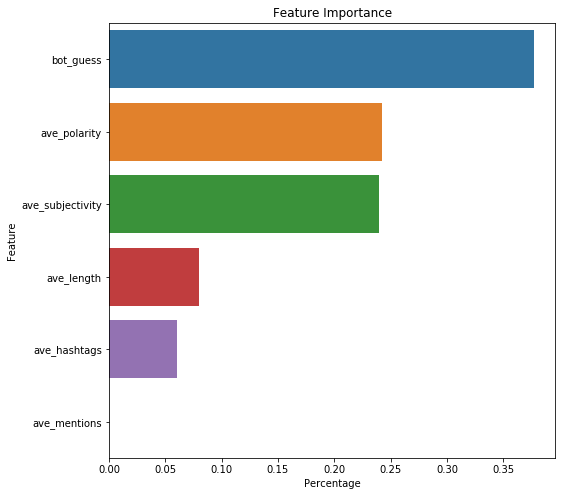

In [7]:
feats = {} 
for feature, importance in zip(X_train.columns, sorted(clf.feature_importances_, reverse=True)):
    feats[feature] = importance 

# graph
bar = pd.DataFrame.from_dict(feats, orient='index')
bar['index'] = bar.index.tolist()
plt.figure(figsize=(8,8))
ax = sns.barplot(x=0, y='index',data=bar)
ax.set(xlabel='Percentage', ylabel='Feature', title="Feature Importance")
plt.show()

In [8]:
clf2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf2.fit(X_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
pred = clf2.predict(X_test2)
accuracy_score(y_test2, pred)

0.8290598290598291

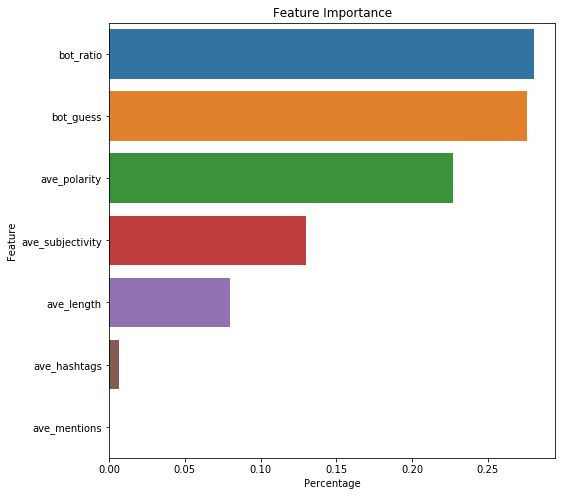

In [10]:
feats = {} 
for feature, importance in zip(X_train2.columns, sorted(clf2.feature_importances_, reverse=True)):
    feats[feature] = importance 

# graph
bar = pd.DataFrame.from_dict(feats, orient='index')
bar['index'] = bar.index.tolist()
plt.figure(figsize=(8,8))
ax = sns.barplot(x=0, y='index',data=bar)
ax.set(xlabel='Percentage', ylabel='Feature', title="Feature Importance")
plt.show()

### Method 2: K-Nearest Neighbors Clustering

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(y_train)
le.transform(y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [13]:
pred = neigh.predict(X_test)
accuracy_score(y_test, pred)

0.7545787545787546

In [14]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(X_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
pred = neigh2.predict(X_test2)
accuracy_score(y_test2, pred)

0.7521367521367521

### Method 3: Linear SVC

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred = svc.predict(X_test)
accuracy_score(y_test, pred)

0.778998778998779

In [19]:
svc2 = SVC(gamma='auto')
svc2.fit(X_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
pred = svc2.predict(X_test2)
accuracy_score(y_test2, pred)

0.7838827838827839

### Method 4: Ada Boost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [23]:
pred = ada.predict(X_test)
accuracy_score(y_test, pred)

0.7606837606837606

In [24]:
ada2 = AdaBoostClassifier()
ada2.fit(X_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [25]:
pred = ada2.predict(X_test2)
accuracy_score(y_test2, pred)

0.7838827838827839